# TP 1: Simulation de variables aléatoires

On rappelle ici quelques méthodes utiles pour la simulation de variables aléatoires. Ces mé-
thodes seront par la suite revues et étendues pour la simulation de processus stochastique, il est
donc nécessaire de bien les connaître. On utilisera ici le langage de programmation Py thon, la
bibliothèque NumPy pour les opérations mathématiques et simulations de variables aléatoires, et
la bibliothèque Matplotlib pour la visualisation des résultats. Tous les programmes commenceront
donc par les lignes de commande suivantes.

In [1]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt

#### Exercice 1 :
On commencera par étudier la simulation de variables aléatoires de loi uniforme.
1. Exécuter plusieurs fois le code ci-dessous. Expliquer les résultats obtenus.

In [2]:
print(npr.rand())
npr.seed(seed=1)
print(npr.rand())
print(npr.rand())
npr.seed(seed=1)
print(npr.rand())
print(npr.rand())

0.4739653823324744
0.417022004702574
0.7203244934421581
0.417022004702574
0.7203244934421581


- `npr.rand()` génère un nombre pseudo-aléatoire différent à chaque appel.
- `npr.seed(1)` initialise le générateur avec la graine 1 : la séquence devient déterministe et reproductible.

Ainsi les deux blocs après `eed(1) produisent exactement les mêmes valeurs (0.417... puis 0.720...). Le
premier appel (sans seed) donne une valeur aléatoire différente à chaque exécution.

2. La fonction npr.rand peut prendre des argument optionnels. Que renvoit npr.rand(10)? npr.rand( 5,3 )? npr.rand (2,3,4) ?

In [5]:
print(npr.rand(10))
print("\n")
print(npr.rand(5,3))
print("\n")
print(npr.rand(2,3,4))

[0.3266449  0.5270581  0.8859421  0.35726976 0.90853515 0.62336012
 0.01582124 0.92943723 0.69089692 0.99732285]


[[0.17234051 0.13713575 0.93259546]
 [0.69681816 0.06600017 0.75546305]
 [0.75387619 0.92302454 0.71152476]
 [0.12427096 0.01988013 0.02621099]
 [0.02830649 0.24621107 0.86002795]]


[[[0.53883106 0.55282198 0.84203089 0.12417332]
  [0.27918368 0.58575927 0.96959575 0.56103022]
  [0.01864729 0.80063267 0.23297427 0.8071052 ]]

 [[0.38786064 0.86354185 0.74712164 0.55624023]
  [0.13645523 0.05991769 0.12134346 0.04455188]
  [0.10749413 0.22570934 0.71298898 0.55971698]]]


- `npr.rand(10)` : retourne un tableau 1D de 10 flottants U[0,1]
- `npr.rand(5,3)` : retourne une matrice 5x3 de flottants U[0,1]
- `npr.rand(2,3,4)` : retourne un tenseur de dimensions 2x3x4

3. Exécuter le code suivant et commenter les résultats.

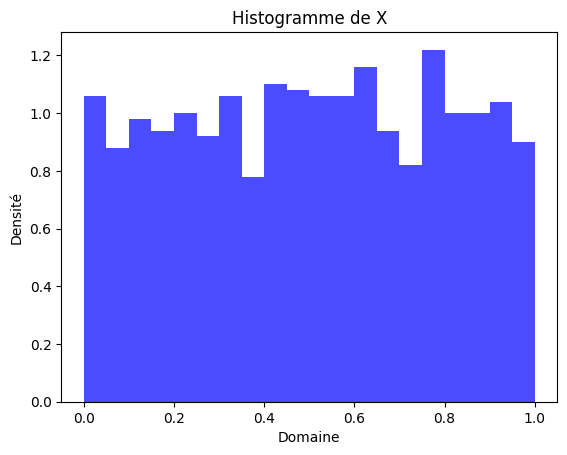

In [6]:
X = npr.rand(1000)
plt.hist(X, bins = 20, range = (0,1), density = True, color = 'blue', alpha = 0.7)
plt.xlabel('Domaine')
plt.ylabel('Densité')
plt.title('Histogramme de X')
plt.show()

L'histogramme est approximativement plat (toutes les barres de hauteur ≈ 1), confirmant que `npr.rand()`
simule bien une loi U[0,1] dont la densité est f(x)=1. Les écarts autour de 1 sont dus aux fluctuations
d'échantillonnage.

#### Exercice 2 :

On considère une expérience aléatoire consistant à lancer un dé bien équilibré. On note D la
variable aléatoire égale au résultat obtenu.
1. Quelle est la loi de D? Quelle est son espérance µ, sa variance σ2 ?
D suit une loi uniforme discrète sur {1,2,3,4,5,6} : P(D=k) = 1/6 pour k=1,...,6

- Espérance : µ = (1+2+3+4+5+6)/6 = 21/6 = 3.5
- Variance : E[D2] = (1+4+9+16+25+36)/6 = 91/6
- σ**2 = E[D2] - µ2
 = 91/6 - (7/2)2
 = 91/6 - 49/4 = 182/12 - 147/12 = 35/12 ≈ 2.917

2. Créer une fonction de6faces(N) qui renvoie un vecteur ligne de taille N dont les coefficients sont des variables aléatoires indépendantes de même loi que D. (On pourra utiliser la fonction floor qui renvoie la partie entière d’un nombre ou d’une matrice, élément par
élément.)

In [8]:
def de6faces(N):
    return np.floor(1 + npr.rand(N) * 6).astype(int)

3. Tracer l’histogramme d’un échantillon de N = 1000 valeurs suivant la loi de D.

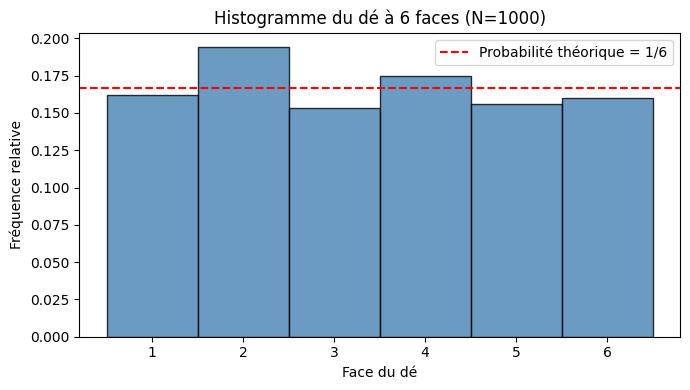

In [10]:
D = de6faces(1000)
faces = np.arange(1, 8)
plt.figure(figsize=(7, 4))
plt.hist(D, bins=faces - 0.5, density=True, color='steelblue', edgecolor='black', alpha=0.8)
plt.axhline(y=1/6, color='red', linestyle='--', label='Probabilité théorique = 1/6')
plt.xticks(range(1, 7))
plt.xlabel('Face du dé')
plt.ylabel('Fréquence relative')
plt.title('Histogramme du dé à 6 faces (N=1000)')
plt.legend()
plt.tight_layout()


4. Écrire une fonction moy_emp(X) qui prend en entrée un vecteur (ligne ou colonne) X et qui renvoie sa moyenne empirique.

In [11]:
def moy_emp(X):
    return np.sum(X)/len(X)

5. Calculer la moyenne empirique d’un échantillon de N = 10000 valeurs suivant la loi de D.
Pouvait-on s’attendre à ce résultat? Justifier la réponse.

**Résultat numérique :** moy_emp ≈ 3.49 (très proche de 3.5).

**Justification :** Par la Loi des Grands Nombres, la moyenne empirique converge presque sûrement vers l'espérance théorique `µ = 3.5` lorsque `N → ∞`. Pour N = 10 000, la convergence est déjà très
bonne.